<a href="https://colab.research.google.com/github/gg-04/ASSIGNMENTS/blob/main/LogisticRegressionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
dataset=pd.read_csv("/computers.csv")

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


In [ ]:
dataset.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


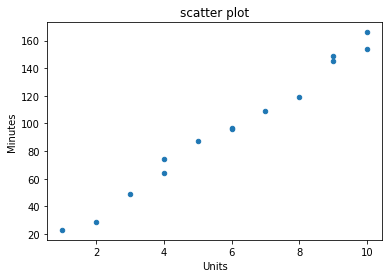

In [ ]:
dataset.plot(kind="scatter",x='Units',y='Minutes')
plt.title("scatter plot")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)



In [ ]:
from sklearn.linear_model import LogisticRegression 
slr=LogisticRegression()
slr.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred=slr.predict(x_test)

In [ ]:
print(y_test)

[109  96  74]


In [ ]:
print(y_pred)

[119  97  64]


In [ ]:
m=slr.coef_
print(m)

[[-1.09826769]
 [-0.75922044]
 [-0.51394696]
 [-0.32461227]
 [-0.16752988]
 [-0.02382977]
 [ 0.27174468]
 [ 0.48366447]
 [ 0.48366498]
 [ 0.82419464]
 [ 0.82413824]]


In [ ]:
c=slr.intercept_
print(c)


[ 4.92434028  4.10765489  3.34390245  2.60647967  1.86330774  1.05586551
 -0.98469889 -2.71319433 -2.71319931 -5.74525895 -5.74519905]


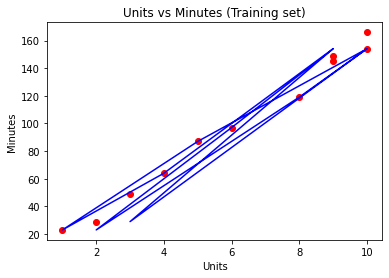

In [ ]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,slr.predict(x_train),color='blue')
plt.title('Units vs Minutes (Training set)')
plt.xlabel('Units')
plt.ylabel('Minutes')
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, slr.predict_proba(x_test),multi_class='ovr')
fpr, tpr, thresholds = roc_curve(y_test, slr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area=%0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



ValueError: ignored